# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos. 
* Es ncesario importar la libreria pandas
* Leer los archivos con "pd.read_csv()"
* Utilizar metodos como "info()" y "head()"  
* Dar el primer vistazo a los datos para entenderlos y verificar si estamos leyendo correctamente
* Aplicar los parametros correctos de lectura


In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# importar librerías

In [6]:
df_instacart_orders =pd.read_csv('/datasets/instacart_orders.csv',sep = ';')
df_products = pd.read_csv('/datasets/products.csv', sep=';') 
df_aisles = pd.read_csv('/datasets/aisles.csv',sep = ';')
df_departments= pd.read_csv('/datasets/departments.csv', sep = ';')
df_order_products=pd.read_csv('/datasets/order_products.csv', sep = ';') # leer conjuntos de datos en los DataFrames

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/instacart_orders.csv'

In [ ]:
df_instacart_orders.info()
display(df_instacart_orders.head())
display(df_instacart_orders.describe())
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [ ]:
df_products.info()
print(df_products.head())
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [ ]:
df_aisles.info()
display(df_aisles.head())
display(df_aisles.describe())
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [ ]:
df_departments.info()
display(df_departments.head())
display(df_departments.describe())
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [ ]:
df_order_products.info(show_counts=True)
display(df_order_products.head())
display(df_order_products.describe())
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
* Los datos se encontraban separados por ";" así que se agregó el parametro correcto de lectura
* Podemos notar que algunos DataFrames contienen datos nulos
* Algunos DataFrames contienen una gran cantidad de filas


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

* Utilizar metodos como "pd.to_numeric()" o "astype()" para convertir los datos al formato deseado
* Determinar que tipo de valores ausentes nos presentan para poder darles el tratamiento más optimo
* Aplicar técnicas para buscar duplicados como "duplicated().sum()", "value_counts()" o busqueda manual. Eliminar los valores duplicados con el metodo "drop_duplicates()" o corrigiendo errores ortográficos.




## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [ ]:
print(f'Pedidos duplicados: {df_instacart_orders.duplicated().sum()}')
print()
display(df_instacart_orders[df_instacart_orders.duplicated()])# Revisa si hay pedidos duplicados


Pedidos duplicados: 15



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

El día y la hora

In [ ]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

filter_day_hour = df_instacart_orders.query('order_dow == 3 and order_hour_of_day == 2')
display(filter_day_hour)
print()
print(filter_day_hour['order_id'].value_counts()) #verificar si hay ordenes duplicadas

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0



2282673    2
1919531    2
1286742    2
1782114    2
2160484    2
          ..
2767450    1
553049     1
774488     1
2027608    1
2725375    1
Name: order_id, Length: 106, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Genial! Hiciste un muy buen trabajo aplicando el filtro y buscando los valores duplicados
</div>

¿Qué sugiere este resultado?

Existen ordenes de pedidos "unicos" con más de un resultado

In [ ]:
df_instacart_orders.drop_duplicates(inplace = True) # Elimina los pedidos duplicados


In [ ]:
print(f'Filas duplicadas: {df_instacart_orders.duplicated().sum()}')# Vuelve a verificar si hay filas duplicadas


Filas duplicadas: 0


In [ ]:
print(f'IDs de pedidos duplicados: {df_instacart_orders["order_id"].duplicated().sum()}') 
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos


IDs de pedidos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Se encontraron valores duplicados en la columna que identifica a los pedidos únicos, lo cual indica la presencia de errores. Por lo tanto, se decidió eliminar los duplicados

### `products` data frame

In [ ]:
print(f'Filas duplicadas: {df_products.duplicated().sum()}')# Verifica si hay filas totalmente duplicadas


Filas duplicadas: 0


In [ ]:
print(f'IDs de departamentos duplicados: {df_products["department_id"].duplicated().sum()}')
print()
display(df_products[df_products["department_id"].duplicated()])
# Revisa únicamente si hay ID de departamentos duplicados


IDs de departamentos duplicados: 49673



,product_id,product_name,aisle_id,department_id
4,5,Green Chile Anytime Sauce,5,13
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7
10,11,Peach Mango Juice,31,7
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [ ]:
df_products['product_name'] = df_products['product_name'].str.upper()

print(f'Nombres de productos duplicados: {df_products["product_name"].duplicated().sum()}')
print()
display(df_products[df_products["product_name"].duplicated()])

# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)


Nombres de productos duplicados: 1361



,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [ ]:
non_null_products = df_products[~df_products['product_name'].isna()]
print(f'Duplicados de productos no faltantes: {non_null_products["product_name"].duplicated().sum()}')

display(non_null_products[non_null_products["product_name"].duplicated()])
# Revisa si hay nombres duplicados de productos no faltantes

Duplicados de productos no faltantes: 104


,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se analizaron los datos duplicados del DataFrame 'products' aplicando los métodos 'duplicated().sum()' al DataFrame total, a sus columnas cuantitativas y categóricas. En las columnas categóricas, unificamos a mayúsculas para una mejor comparación. Después, creamos un filtro para buscar duplicados sin valores nulos.

Se detectaron duplicados que pueden ser tratados como datos categóricos. También se identificó que había valores nulos que estaban afectando el número de duplicados


### `departments` data frame

In [ ]:
print('Filas duplicadas:', df_departments.duplicated().sum())
# Revisa si hay filas totalmente duplicadas

Filas duplicadas: 0


In [ ]:
print('IDs duplicados:', df_departments['department_id'].duplicated().sum()) 
# Revisa únicamente si hay IDs duplicadas de productos

IDs duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el DataFrame 'departments' no existen valores duplicados. Es un DataFrame con pocas filas que guarda el identificador de cada departamento


### `aisles` data frame

In [ ]:
 print('Filas duplicadas:', df_aisles.duplicated().sum()) # Revisa si hay filas totalmente duplicadas

Filas duplicadas: 0


In [ ]:
 print('IDs duplicados:', df_aisles['aisle_id'].duplicated().sum())# Revisa únicamente si hay IDs duplicadas de productos


IDs duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el DataFrame 'aisles' no existen valores duplicados. Es un DataFrame que guarda el identificador de cada pasillo

### `order_products` data frame

In [ ]:
 print('Filas duplicadas:', df_order_products.duplicated().sum()) # Revisa si hay filas totalmente duplicadas


Filas duplicadas: 0


In [ ]:
     
print("Duplicados de order_id y product_id:")
print(df_order_products[['order_id','product_id']].duplicated().sum()) # Analizando duplicados

# Vuelve a verificar si hay cualquier otro duplicado engañoso

Duplicados de order_id y product_id:
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

* De acuerdo con el diccionario de datos, cada fila en order_products.csv corresponde a un artículo en un pedido. Para encontrar duplicados engañosos, buscamos específicamente en la combinación de las columnas order_id y product_id, ya que un duplicado en esta combinación significaría un error


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
print(df_products[df_products['product_name'].isna()])
# Encuentra los valores ausentes en la columna 'product_name'

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Tenemos dos datos en común, el pasillo 100 y el departamento 21

In [ ]:
print(df_products[(df_products['product_name'].isna()) & (df_products['aisle_id'] != 100)])
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

Si, Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100 porque el resultado de buscar un desigual nos arroja un DataFrame vacio

In [ ]:
print(df_products[(df_products['product_name'].isna()) & (df_products['department_id'] != 21)])
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

Si, todos los nombres de productos ausentes están relacionados con el departamento con ID 21 porque el resultado de buscar un desigual nos arroja un DataFrame vacio

In [ ]:
print(df_departments[df_departments['department_id'] == 21])
print()
print(df_aisles[df_aisles['aisle_id'] == 100])
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.


    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.

Para los datos de nombre de productos faltantes tambien le son desconocidos los datos del pasillo y el departamento al que pertenecen

In [ ]:
df_products['product_name'].fillna('Unknown', inplace =True)
# Completa los nombres de productos ausentes con 'Unknown'


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se descubrió que los valores ausentes de los nombres de productos estaban relacionados con datos desconocidos de pasillo y departamento, por lo tanto se decidió rellenarlo con el string 'Unknown'

### `orders` data frame

In [ ]:
print(df_instacart_orders.isna().sum())
print(df_instacart_orders[df_instacart_orders['days_since_prior_order'].isna()])# Encuentra los valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4               

In [ ]:
print(df_instacart_orders[(df_instacart_orders['days_since_prior_order'].isna()) & (df_instacart_orders['order_number']!=1)])

# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Los valores faltantes de la columna "días desde la orden anterior" se generan porque es la primer orden que se hace

### `order_products` data frame

In [ ]:
print(df_order_products.isna().sum())
print(df_order_products[df_order_products['add_to_cart_order'].isna()])
# Encuentra los valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [ ]:
print("Valor maximo:",df_order_products['add_to_cart_order'].max())
print("Valor minimo:",df_order_products['add_to_cart_order'].min())
# ¿Cuáles son los valores mínimos y máximos en esta columna?


Valor maximo: 64.0
Valor minimo: 1.0


Describe brevemente cuáles son tus hallazgos.

Los valores faltantes se generan probalemente porque es la primera vez que se hace el pedido

In [ ]:
na_values = df_order_products[df_order_products['add_to_cart_order'].isna()]
oder_id_na = na_values['order_id'].unique()
print(oder_id_na)
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'


[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [ ]:
order_na_filter = df_order_products[df_order_products['order_id'].isin(oder_id_na)] 
sum_grp_order = order_na_filter.groupby('order_id')['product_id'].count()
print('Productos minimo de pedidos con valores ausentes:',sum_grp_order.min())
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


Productos minimo de pedidos con valores ausentes: 65


Describe brevemente cuáles son tus hallazgos.

Todos los pedidos con una cantidad mayor de 65 productos ocacionan un valor ausente en la columna "add_to_cart_order"

In [ ]:
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna('999').astype(int)
df_order_products.info(show_counts=True)
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se decidó rellenar los valores nulos con el número 999 y se convirtienron los valores a enteros ya que tenian el formato float

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

* En esta etapa del proyecto observamos de dónde provienen los valores duplicados y los valores ausentes, es necesario enteder esta parte para darle procesamiento adecuado


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [ ]:
print(df_instacart_orders['order_hour_of_day'].min())
print(df_instacart_orders['order_hour_of_day'].max())


0
23


In [ ]:
print(df_instacart_orders['order_dow'].min())
print(df_instacart_orders['order_dow'].max())

0
6


Escribe aquí tus conclusiones

Los valores son correctos, los cuales representan los días y las hora del pedido

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

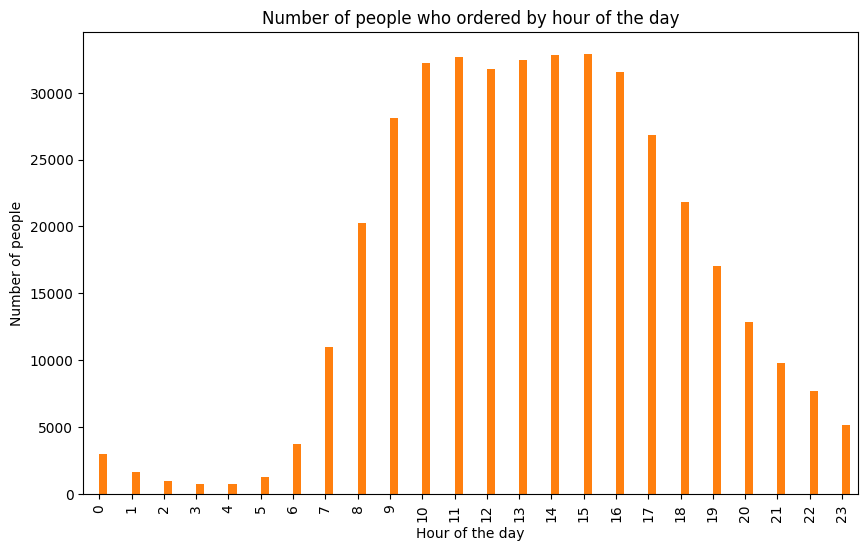

In [ ]:
users_per_hour = df_instacart_orders.groupby('order_hour_of_day')['user_id'].nunique().reset_index()
# DF que agrupa el número de usuarios unicos por hora

# Crear el gráfico de barras
users_per_hour.plot(
    kind='bar',
    title='Number of people who ordered by hour of the day',
    xlabel='Hour of the day',
    ylabel='Number of people',
    legend = False,
    figsize = (10,6))

# Mostrar el gráfico
plt.show()

Escribe aquí tus conclusiones

La mayoria de las  personas tienden a hacer sus pedidos entre las 10 y 16 horas

### [A3] ¿Qué día de la semana compran víveres las personas?

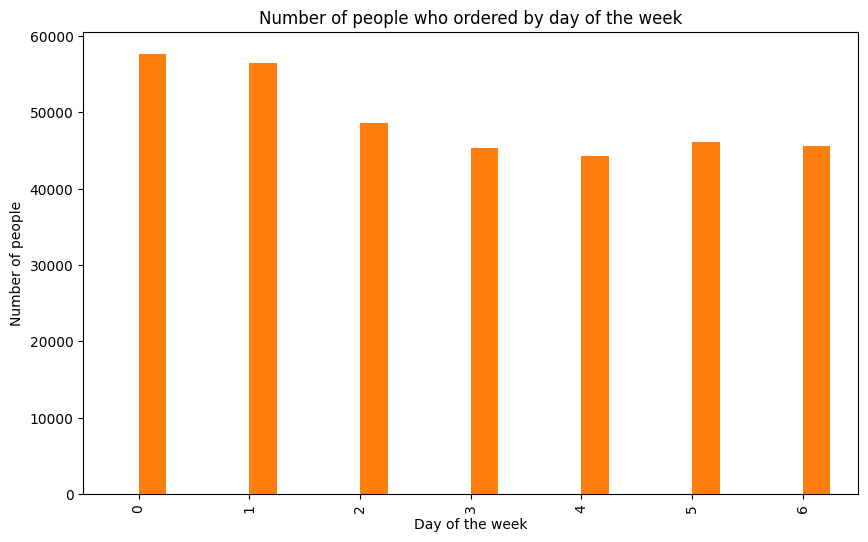

In [ ]:
users_per_day = df_instacart_orders.groupby('order_dow')['user_id'].nunique().reset_index()
# DF que agrupa el número de usuarios unicos por día de pedido

# Crear el gráfico de barras
users_per_day.plot(
                    title = 'Number of people who ordered by day of the week',
                    xlabel = 'Day of the week',
                    ylabel = 'Number of people',
                    legend = False,
                    figsize = (10,6),
                    kind = 'bar'
                   )

# Mostrar el gráfico
plt.show()

Escribe aquí tus conclusiones

Las personas tienen una leve preferencia a realizar sus pedidos los domingos y los lunes

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

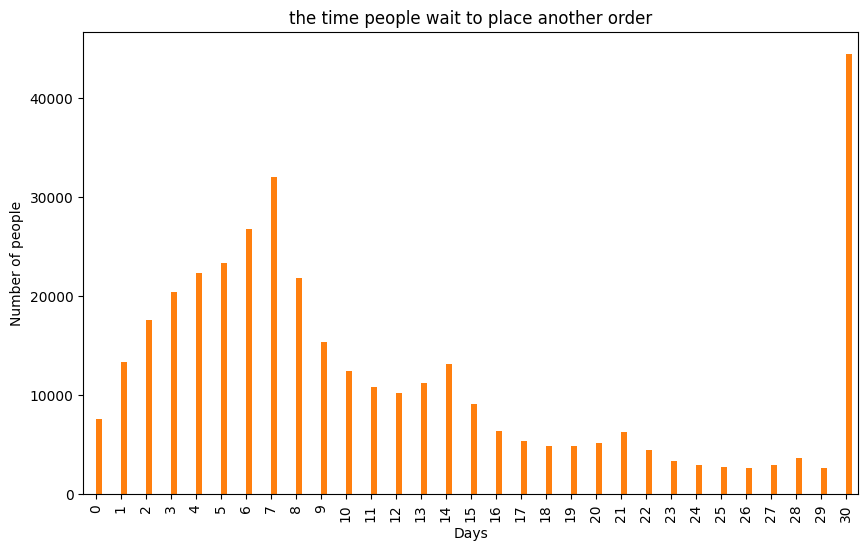

,days_since_prior_order,user_id
count,31.000000,31.000000
mean,15.000000,11931.645161
std,9.092121,10062.336917
min,0.000000,2620.000000
25%,7.500000,4637.000000
50%,15.000000,9044.000000
75%,22.500000,16453.000000
max,30.000000,44444.000000


In [ ]:
users_prior_order = df_instacart_orders.groupby('days_since_prior_order')['user_id'].nunique().reset_index()
# DF que agrupa el numero de usuarios por los dias que se tardaron en hacer el siguiente pedido

# Crear el gráfico 
users_prior_order.plot(
                    title = 'the time people wait to place another order',
                    xlabel = 'Days',
                    ylabel = 'Number of people',
                    legend = False,
                    figsize = (10,6),
                    kind = 'bar',
                   )

# Mostrar el gráfico
plt.show()




# Calculo de minimos y maximos
display(users_prior_order.describe())

Escribe aquí tus conclusiones

La mayoria de las personas esperan 30 dias en hacer el proximo pedido. El tiempo oscila entre 0 y 30 días de espera.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [ ]:
# Filtrar los datos para miércoles (order_dow = 3) y sábados (order_dow = 6)
wedn_sat = df_instacart_orders[(df_instacart_orders['order_dow'] == 3) | (df_instacart_orders['order_dow'] == 6)]

# Pivot Table
pivot_wednesday_saturday = wedn_sat.pivot_table(index = 'order_hour_of_day',columns = 'order_dow', values = 'order_id',aggfunc = 'count')

pivot_wednesday_saturday


# Graficar
pivot_wednesday_saturday.plot(kind = 'bar',
                              xlabel = 'order hour of the day',
                              ylabel = 'orders',
                              title = 'Wednenesday vs Saturday',
                              figsize = (10,6)
                             )

plt.legend(['Wednesday','Saturday'])                             
plt.show()


NameError: name 'df_instacart_orders' is not defined

Escribe aquí tus conclusiones

* Se observan que la distribución de pedidos por hora es muy similar los miércoles y sábados, teniendo una leve ventaja los sábados en la franja del medio día.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la gráfica y la conclusión a partir de la misma
</div>

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

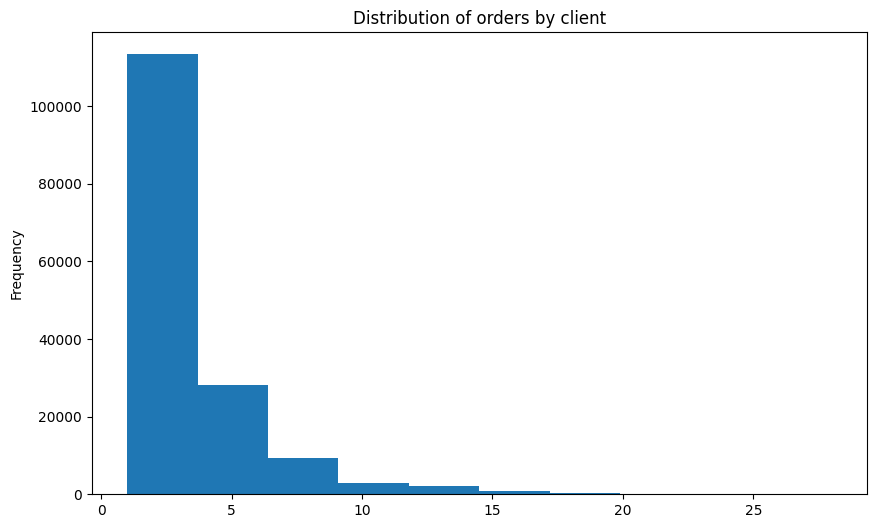

In [ ]:
# Contar el número de órdenes por cliente
order_counts = df_instacart_orders.groupby('user_id')['order_id'].nunique().sort_index()

# Crear el gráfico histograma
order_counts.plot(kind = 'hist',
                  xlabel= 'orders by client',
                  ylabel= 'Frequency',
                  title= 'Distribution of orders by client',
                  figsize= (10,6)
                 )
plt.show()
                  
                 


Escribe aquí tus conclusiones

La distribución esta muy inclinada hacia la izquierda, lo que quiere decir que la mayoria de los clientes no piden más de 5 veces.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
# Contar la frecuencia de cada producto
product_counts = df_order_products['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']

# Obtener los 20 productos más frecuentes
top_20_products = product_counts.head(20)

# Unir con el DataFrame de productos para obtener los nombres
top_20_products = top_20_products.merge(df_products, on='product_id', how='left')
                                    
# Mostrar los 20 productos más frecuentes
top_20_products = top_20_products[['product_id', 'product_name', 'count']] # Solamente las columnas que nos interesan

top_20_products['product_name_id'] = top_20_products['product_id'].astype(str) + '-' +top_20_products['product_name'] # Creando una columna que muestre el id y el nombre

display(top_20_products) 



,product_id,product_name,count,product_name_id
0,24852,BANANA,66050,24852-BANANA
1,13176,BAG OF ORGANIC BANANAS,53297,13176-BAG OF ORGANIC BANANAS
2,21137,ORGANIC STRAWBERRIES,37039,21137-ORGANIC STRAWBERRIES
3,21903,ORGANIC BABY SPINACH,33971,21903-ORGANIC BABY SPINACH
4,47209,ORGANIC HASS AVOCADO,29773,47209-ORGANIC HASS AVOCADO
5,47766,ORGANIC AVOCADO,24689,47766-ORGANIC AVOCADO
6,47626,LARGE LEMON,21495,47626-LARGE LEMON
7,16797,STRAWBERRIES,20018,16797-STRAWBERRIES
8,26209,LIMES,19690,26209-LIMES
9,27845,ORGANIC WHOLE MILK,19600,27845-ORGANIC WHOLE MILK


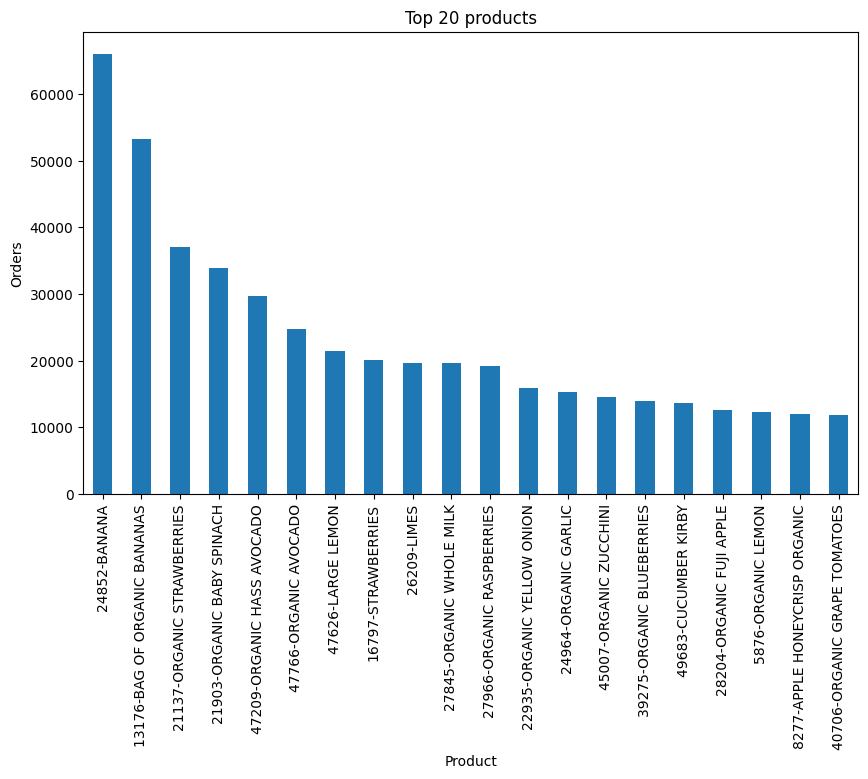

In [ ]:
# Creando gráfica
top_20_products.plot(x= 'product_name_id',
                     y = 'count',
                     kind = 'bar',
                     xlabel = 'Product',
                     ylabel= 'Orders',
                     title= 'Top 20 products',
                     legend= False,
                     figsize=(10,6)
                    )
plt.show()


Escribe aquí tus conclusiones

Las frutas y verduras son los articulos mas populares.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

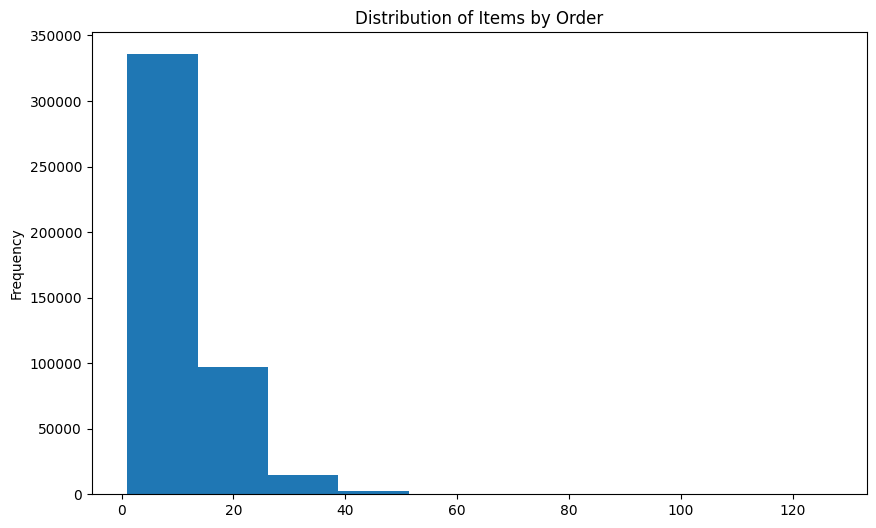

In [ ]:
# Calcular cuántos artículos compra cada persona en un pedido
items_per_order = df_order_products.groupby('order_id').size()

# Crear el gráfico de distribución
items_per_order.plot(kind = 'hist',
                     title = 'Distribution of Items by Order',
                     xlabel = 'Number of Items per Order',
                     ylabel = 'Number of Orders',
                     figsize = (10, 6)
                    )

# Mostrar el gráfico
plt.show()



Escribe aquí tus conclusiones

* La gran mayoría de las personas no compran más de 20 artículos por orden

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

,product_id,product_name,count
24851,24852,BANANA,55763
13175,13176,BAG OF ORGANIC BANANAS,44450
21136,21137,ORGANIC STRAWBERRIES,28639
21902,21903,ORGANIC BABY SPINACH,26233
47208,47209,ORGANIC HASS AVOCADO,23629
47765,47766,ORGANIC AVOCADO,18743
27844,27845,ORGANIC WHOLE MILK,16251
47625,47626,LARGE LEMON,15044
27965,27966,ORGANIC RASPBERRIES,14748
16796,16797,STRAWBERRIES,13945


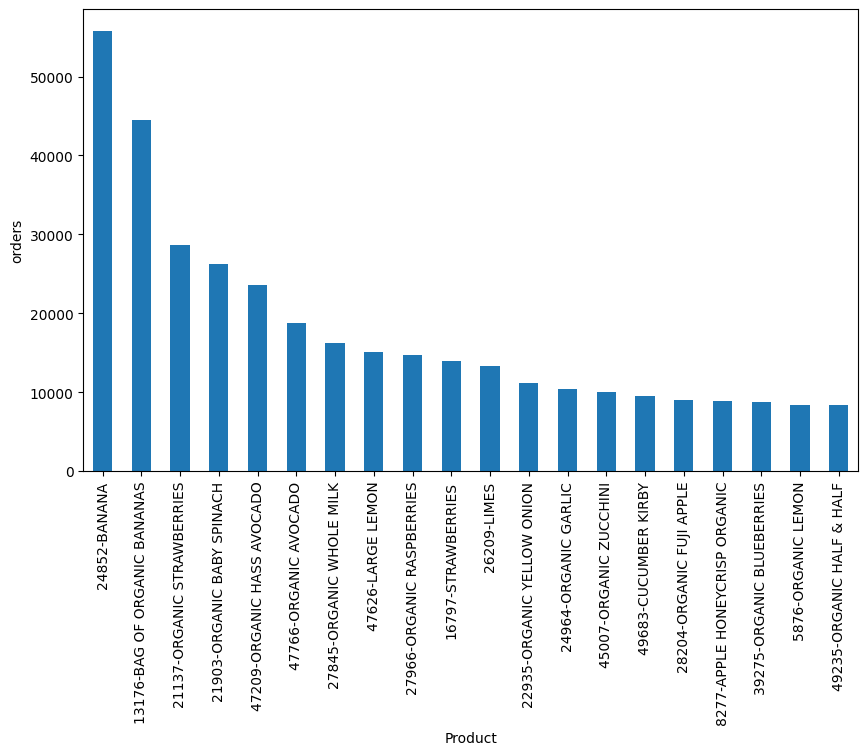

In [ ]:
# Filtro para mostrar solamente los artículos que ya se hayan ordenado
reordered_products = df_order_products[df_order_products['reordered'] == 1]

# Unir los DF para mostrar los nombre y ID's de los 20 principales artículos
top_20_reordered = pd.merge(
    left=df_products[["product_id", "product_name"]],
    right=reordered_products['product_id'].value_counts().nlargest(20).rename("count"),
    left_on="product_id",
    right_index=True
).sort_values(by = 'count',ascending = False)

# Mostrar tabla
display(top_20_reordered)

# Hacer columna que contenga los nombres y Id's de los productos
top_20_reordered['reordered_name_id'] = top_20_reordered['product_id'].astype(str) + '-' +top_20_reordered['product_name']

# Crear gráfico
top_20_reordered.plot(x= 'reordered_name_id',
                      y = 'count', 
                      kind = 'bar',
                      xlabel = 'Product',
                      ylabel = 'orders',
                      figsize = (10,6),
                      legend = False
                     )
plt.show()


Escribe aquí tus conclusiones

* Los productos que más se vuelven a pedir son frutas y verduras

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64

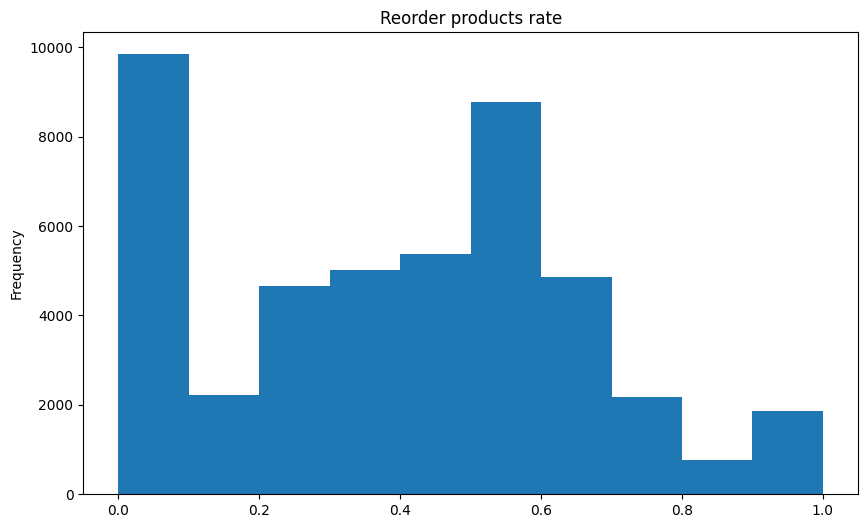

In [ ]:
# Calcular proporción que un artículo se vuelve a pedir
reorder_rate = df_order_products.groupby('product_id')['reordered'].mean()

# Mostrar
display(reorder_rate)

# Gráficar 

reorder_rate.plot(kind = 'hist',
                  title = 'Reorder products rate',
                  figsize = (10,6)
                 )
plt.show()

Escribe aquí tus conclusiones

* Se pueden observar dos picos muy altos uno en la cantidad de productos que se vuelven a ordenar, el primero es 0 lo que significa que ya no se vuelven a ordenar, y el segundo pico se encuentra en el medio, lo que significa que las veces que se reordenan es similar a las veces que ya no se vuelven a ordenar.

* En general la distribucion se inclina mas hacia el lado izquierdo, lo que significa que en la mayoria de los casos ya no se reordena un producto

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
# Juntamos los dos DF para extraer la columna de usuarios
clients_reorder = pd.merge(
    left=df_instacart_orders[["order_id","user_id"]],
    right=df_order_products[['order_id','reordered']],
    on = 'order_id'
)

display(clients_reorder)   


,order_id,user_id,reordered
0,1515936,183418,1
1,1515936,183418,1
2,1515936,183418,0
3,1515936,183418,0
4,1515936,183418,0
...,...,...,...
4545002,2071924,1730,0
4545003,2071924,1730,1
4545004,2071924,1730,1
4545005,2071924,1730,1


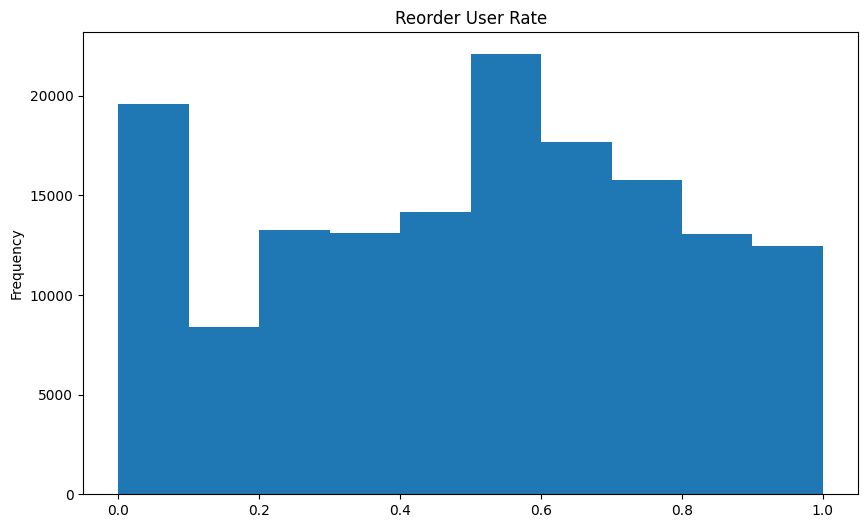

In [ ]:
# Calcular tasa de reorden por usuario
reorder_user_rate = clients_reorder.groupby('user_id')['reordered'].mean()

# Crear gráfico
reorder_user_rate.plot(kind = 'hist',
                      title = 'Reorder User Rate',
                      figsize = (10,6)
                     )
                  
                 
plt.show()


Escribe aquí tus conclusiones

* La distribución es muy similar a la anterior en los picos de las distribuciones, la diferencia que veo es que la grafica de la tasa de los usuarios que vuelven a ordenar se inclina hacia la derecha, lo que quiere decir que los usuarios se inclinan por mas por odernar de nuevo.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
# Filtrar artículos que son los primeros en poner en el carrito
first_add_to_cart_order = df_order_products[df_order_products['add_to_cart_order'] == 1]

# Unir los DF para extraer el nombre del producto y el ID; extraer los 20 que más se repiten
top_20_add_to_cart_order = pd.merge(
    left=df_products[["product_id", "product_name"]],
    right=first_add_to_cart_order['product_id'].value_counts().nlargest(20).rename("count"),
    left_on="product_id",
    right_index=True
).sort_values(by = 'count',ascending = False)

#Mostrar tabla
display(top_20_reordered)

# Agregar columna con el nombre y el ID de los productos
top_20_add_to_cart_order['product_name_id'] = top_20_add_to_cart_order['product_id'].astype(str) + '-' +top_20_add_to_cart_order['product_name']



,product_id,product_name,count,reordered_name_id
24851,24852,BANANA,55763,24852-BANANA
13175,13176,BAG OF ORGANIC BANANAS,44450,13176-BAG OF ORGANIC BANANAS
21136,21137,ORGANIC STRAWBERRIES,28639,21137-ORGANIC STRAWBERRIES
21902,21903,ORGANIC BABY SPINACH,26233,21903-ORGANIC BABY SPINACH
47208,47209,ORGANIC HASS AVOCADO,23629,47209-ORGANIC HASS AVOCADO
47765,47766,ORGANIC AVOCADO,18743,47766-ORGANIC AVOCADO
27844,27845,ORGANIC WHOLE MILK,16251,27845-ORGANIC WHOLE MILK
47625,47626,LARGE LEMON,15044,47626-LARGE LEMON
27965,27966,ORGANIC RASPBERRIES,14748,27966-ORGANIC RASPBERRIES
16796,16797,STRAWBERRIES,13945,16797-STRAWBERRIES


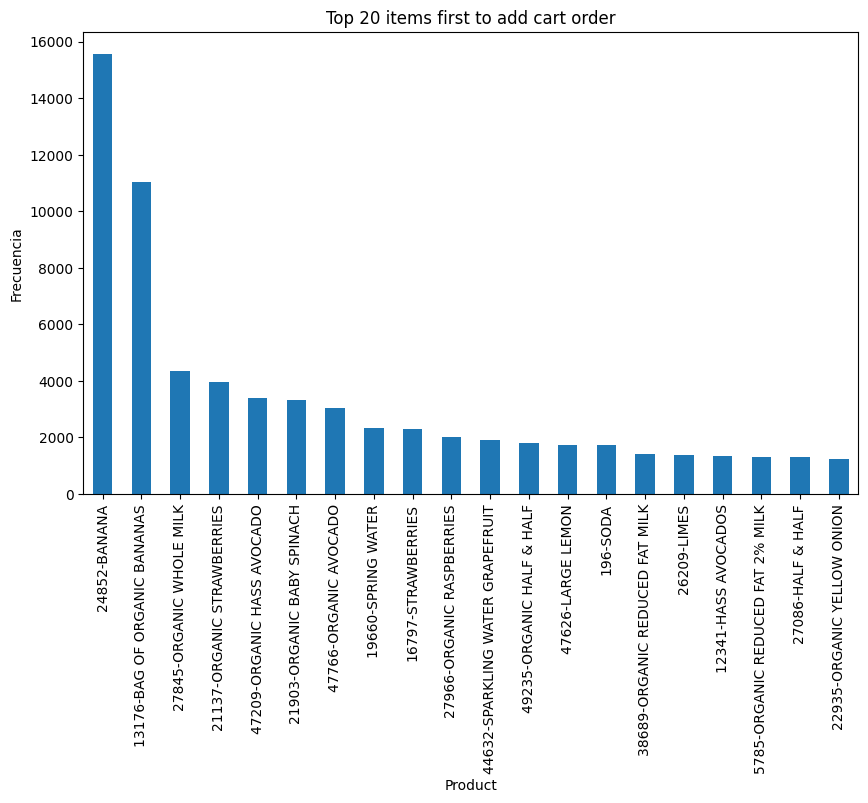

In [ ]:
# Graficar
top_20_add_to_cart_order.plot(x= 'product_name_id',
                              y = 'count',
                              kind = 'bar',
                              xlabel = 'Product',
                              ylabel = 'Frecuencia',
                              title = 'Top 20 items first to add cart order',
                              legend = False,
                              figsize = (10,6)                             
                             )
plt.show()

Escribe aquí tus conclusiones

* La mayoria de los primero articulos que la gente agrega a sus carritos son frutas y verduras

### Conclusion general del proyecto:

* Se han conseguido sacar buenos análisis sobre el consumo de las personas, lo cual nos podria ayudar a la toma de decisiones de todo tipo, como ofertas, abastecimiento de insumos, publicidad, etc.

* Si bien el análisis está bien, creo que podria ser mejor si nos mostrar los datos de la fecha en que fueron hechas las ordenes para poder preveer algun tipo de estacionalidad y darnos una idea de cuan grande es el periodo de muestra que se analiza.



